In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

## Label distribution in collected data

I am using the dataset with 100Hz sampling rate. Label distribution is the same for the downsampled dataset.

Each row of the dataset represents one type of movement that was labelled. Where:
- acc_x, acc_y, acc_z are accelerations
- gyro_x, gyro_y, gyro_z are angular velocities
- all rows have a label where:
    - 0 is `no` movement
    - 1 is `x` axis movement
    - 2 is `y` axis movement
    - 3 is `circle` movement
- `shift` is the shift from the originally labelled start. `shift` values are represented by steps - i.e. shift of 2 is 2 x 10ms = 20ms as the original sampling period was 10ms
- all signals have a numeral suffix denoting the point in time. As an example acc_x_500 is the value of acceleration in the direction of axis X, 500ms since start.

In [2]:
df = pd.read_csv('data/transformed/20210529_v2_data_all_100hz.csv').reset_index(drop=True)
df = df[df['shift'] == 0] # using the baseline dataset - as labeled
df = df.drop('shift', axis=1)
df.head(5)

,acc_x_0,acc_y_0,acc_z_0,gyro_x_0,gyro_y_0,gyro_z_0,acc_x_10,acc_y_10,acc_z_10,gyro_x_10,...,gyro_x_990,gyro_y_990,gyro_z_990,acc_x_1000,acc_y_1000,acc_z_1000,gyro_x_1000,gyro_y_1000,gyro_z_1000,label
2,0.119710,0.076614,10.15860,-0.931298,1.717557,3.305344,0.248997,0.100556,10.15620,-0.931298,...,-0.862595,0.900763,0.366412,-0.011971,-0.095768,10.08677,-0.664122,1.076336,-0.236641,1
32,-0.205901,0.019154,10.09874,-0.648855,2.496183,-1.335878,0.751779,0.392649,10.22803,-0.274809,...,-1.091603,1.083969,-0.977099,-0.129287,-0.021548,10.07001,-0.870229,1.068702,-1.114504,1
42,0.232238,-0.090980,10.12029,-0.854962,1.717557,-6.610687,0.469264,-0.162806,10.17057,-0.595420,...,-0.916030,1.190840,-3.305344,-0.126893,-0.011971,10.08198,-0.893130,1.129771,-2.541985,1
46,0.169988,0.232238,10.14902,-1.167939,1.587786,4.694656,1.055843,0.452504,10.08438,-0.419847,...,-0.801527,1.404580,-1.160305,-0.201113,-0.014365,10.14184,-0.587786,1.312977,-1.030534,1
50,0.251391,0.162806,10.17296,0.679389,2.442748,-1.175573,0.241814,-0.105345,10.07241,0.114504,...,0.328244,1.587786,0.175572,0.074220,-0.016759,10.14184,-0.389313,0.473282,-2.015267,1


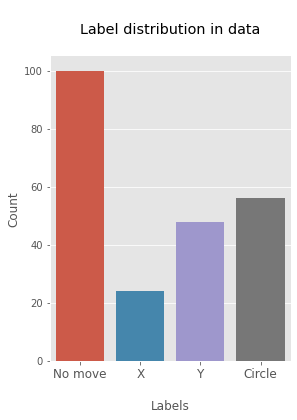

In [3]:
g = sns.catplot(x='label', data=df, kind='count', height=5, aspect=0.8);
g.ax.set_title('\nLabel distribution in data\n')
g.ax.set_xlabel('\nLabels')
g.ax.set_ylabel('Count')
g.ax.set_xticklabels(['No move','X','Y','Circle'], fontsize=12);

## Plotting relationships between signals



In [12]:
def filter_dataset_by_label(df: pd.DataFrame, label: int) -> pd.DataFrame:
    return df[df['label'] == label].drop('label', axis=1)

def get_acc_dfs(df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame, pd.DataFrame):
    df_acc_x = pd.DataFrame(df.filter(regex='acc_x')).T.reset_index()
    df_acc_y = pd.DataFrame(df.filter(regex='acc_y')).T.reset_index()
    df_acc_z = pd.DataFrame(df.filter(regex='acc_z')).T.reset_index()

    return df_acc_x, df_acc_y, df_acc_z

def extract_time(sr: pd.Series) -> pd.Series:
    return sr.str.split('_').str[-1]

def extract_signal(df: pd.DataFrame) -> pd.DataFrame:
    df['signal'] = df['index'].str.extract(r'(.*)_\d{1,4}')
    return df

def melt_df(df: pd.DataFrame) -> list:
    signals = ['acc_x', 'acc_y','acc_z','gyro_x','gyro_y','gyro_z']
    return [pd.melt(df[df['signal'] == s].drop('signal', axis=1)).rename(columns={'value':s}) for s in signals]

In [13]:
df_x = filter_dataset_by_label(df, 1).T.reset_index()
df_y = filter_dataset_by_label(df, 2).T.reset_index()
df_circle = filter_dataset_by_label(df, 3).T.reset_index()

In [14]:
df_x = extract_signal(df_x)
df_y = extract_signal(df_y)
df_circle = extract_signal(df_circle)

In [15]:
df_x = df_x.drop('index', axis=1)
df_y = df_y.drop('index', axis=1)
df_circle = df_circle.drop('index', axis=1)

In [16]:
df_x_acc_x, df_x_acc_y, df_x_acc_z, df_x_gyro_x, df_x_gyro_y, df_x_gyro_z = melt_df(df_x)
df_y_acc_x, df_y_acc_y, df_y_acc_z, df_y_gyro_x, df_y_gyro_y, df_y_gyro_z = melt_df(df_y)
df_circle_acc_x, df_circle_acc_y, df_circle_acc_z, df_circle_gyro_x, df_circle_gyro_y, df_circle_gyro_z = melt_df(df_circle)

In [17]:
df_circle_acc = pd.concat([df_circle_acc_x, df_circle_acc_y'', df_circle_acc_z''], axis=1)
df_x_acc = pd.concat([df_x_acc_x, df_x_acc_y'', df_x_acc_z''], axis=1)
df_y_acc = pd.concat([df_y_acc_x, df_y_acc_y'', df_y_acc_z''], axis=1)

In [18]:
# df_x_acc = pd.concat([df_x_acc_x,df_x_acc_x, df_x_acc_z], axis=1)
# df_x_gyro = pd.concat([df_x_gyro_x,df_x_gyro_x,df_x_gyro_z], axis=1)

# df_y_acc = pd.concat([df_y_acc_x, df_y_acc_y, df_y_acc_z], axis=1)
# df_y_gyro = pd.concat([df_y_gyro_x, df_y_gyro_y, df_y_gyro_z], axis=1)

# df_circle_acc = pd.concat([df_circle_acc_x, df_circle_acc_y, df_circle_acc_z], axis=1)
# df_circle_gyro = pd.concat([df_circle_gyro_x, df_circle_gyro_y, df_circle_gyro_z], axis=1)

df_x_acc['label'] = 'x'
df_x_gyro['label'] = 'x'

df_y_acc['label'] = 'y'
df_y_gyro['label'] = 'y'

df_circle_acc['label'] = 'circle'
df_circle_gyro['label'] = 'circle'

NameError: name 'df_x_acc' is not defined

In [ ]:
# df_y_acc.index = df_x_acc.index[-1] + 2 + df_y_acc.index
# df_circle_acc.index = df_y_acc.index[-1] + 2 + df_circle_acc.index
# df_x_acc.index, df_y_acc.index, df_circle_acc.index

In [ ]:
df_acc = pd.concat([df_x_acc, df_y_acc, df_circle_acc], axis=0)
# df_gyro = pd.concat([df_x_gyro, df_y_gyro, df_circle_gyro], axis=0, ignore_index=True)

In [ ]:
g = sns.pairplot(
    df_acc,
    hue='label',
    height=5,
    markers='+'
    );